In [1]:
!pip install mglearn

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


  Stored in directory: C:\Users\Gaurav\AppData\Local\pip\Cache\wheels\74\cf\8d\04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [3]:
adult_df = pd.read_csv("adult.csv")

In [4]:
adult_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
#Objective - to predict whether a person with given attribute values is likely to be earning more than 50K

# To use a linear classifier such as a logistic regression, we will have to convert the non-numeric columns to numeric
# For e.g. "education" , "occupation" etc

# Though we can use the numeric columns directly, we will categorize them too as part of our effor to get the best model
# This can be easily done using ColumnTransformer class...

# The ColumnTransformer will take as input a name for the transformer, a transformer function, column name to transform

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
ct = ColumnTransformer([("scaling", StandardScaler(), ['age' , 'hours-per-week']), ("OneHotCoding", OneHotEncoder(sparse=False),
                                                                                  ['workclass', 'education', 'gender', 'occupation'])])

In [8]:
adult_features = adult_df.drop("income" , axis=1)

In [9]:
X_trainvalid, X_test, y_trainvalid, y_test = train_test_split(adult_features, adult_df.income,test_size=.25, random_state=0)

# Splitting the adult_df_trainValidate into training and validation set

X_train,X_valid,y_train,y_valid = train_test_split(X_trainvalid, y_trainvalid)

In [10]:
print("Adult dataset - ", adult_df.shape)
print("X_test - ", X_test.shape)
print("X_trainvlaid - ", X_trainvalid.shape)
print("X_train - ", X_train.shape)
print("x_valid - ", X_valid.shape)

Adult dataset -  (48842, 15)
X_test -  (12211, 14)
X_trainvlaid -  (36631, 14)
X_train -  (27473, 14)
x_valid -  (9158, 14)


In [11]:
ct.fit(X_train)   #note, this is not building a model. Observe, only the features are sent to the fit function

C:\Users\Gaurav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Gaurav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('scaling', StandardScaler(copy=True, with_mean=True, with_std=True), ['age', 'hours-per-week']), ('OneHotCoding', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

In [12]:
X_train_transformed = ct.transform(X_train)
print(X_train_transformed.shape)

(27473, 44)


C:\Users\Gaurav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:605: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


In [13]:
print(X_train[0:1])
t = pd.DataFrame(X_train_transformed[0:1])   #Transform one record to see the result of transformation
t.head()

       age workclass  fnlwgt     education  educational-num  \
13005   55   Private  147989  Some-college               10   

           marital-status    occupation relationship   race gender  \
13005  Married-civ-spouse  Craft-repair      Husband  White   Male   

       capital-gain  capital-loss  hours-per-week native-country  
13005             0             0              58  United-States  


,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,1.181016,1.414734,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
logreg = LogisticRegression()
logreg.fit(X_train_transformed, y_train)  # Logistic regression works without any complaint about the data type!

C:\Users\Gaurav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
X_valid_transformed = ct.transform(X_valid)  # Using validatin data for the testing

print("Test Score :" , logreg.score(X_valid_transformed, y_valid))

Test Score : 0.8145883380650797


C:\Users\Gaurav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\pipeline.py:605: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


In [16]:
# We can also make use of pandas dummies function instead of the OneHotCoder

print("original features :\n" ,list(X_train) )

#X_train_dummies = pd.get_dummies(X_train , columns=['workclass', 'education', 'gender', 'occupation'])
X_train_dummies = pd.get_dummies(X_train )
print("Transformed features \n"), list(X_train_dummies)

original features :
 ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
Transformed features 



(None,
 ['age',
  'fnlwgt',
  'educational-num',
  'capital-gain',
  'capital-loss',
  'hours-per-week',
  'workclass_?',
  'workclass_Federal-gov',
  'workclass_Local-gov',
  'workclass_Never-worked',
  'workclass_Private',
  'workclass_Self-emp-inc',
  'workclass_Self-emp-not-inc',
  'workclass_State-gov',
  'workclass_Without-pay',
  'education_10th',
  'education_11th',
  'education_12th',
  'education_1st-4th',
  'education_5th-6th',
  'education_7th-8th',
  'education_9th',
  'education_Assoc-acdm',
  'education_Assoc-voc',
  'education_Bachelors',
  'education_Doctorate',
  'education_HS-grad',
  'education_Masters',
  'education_Preschool',
  'education_Prof-school',
  'education_Some-college',
  'marital-status_Divorced',
  'marital-status_Married-AF-spouse',
  'marital-status_Married-civ-spouse',
  'marital-status_Married-spouse-absent',
  'marital-status_Never-married',
  'marital-status_Separated',
  'marital-status_Widowed',
  'occupation_?',
  'occupation_Adm-clerical',
 

In [17]:
X_train_dummies.shape

(27473, 108)

In [18]:
logreg.fit(X_train_dummies, y_train)  # Logistic regression works without any complaint about the data type!

C:\Users\Gaurav\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
X_valid_dummies = pd.get_dummies(X_valid)  # Using validation data for the testing
print(X_valid_dummies.shape)

print("Test Score :" , logreg.score(X_valid_dummies, y_valid))

(9158, 107)


ValueError: X has 107 features per sample; expecting 108

In [ ]:
# Be careful both with pd.get_dummies and OneHotEncoder. When we split our data into traning and testing, the get_dummies and
# OneHotEncoder will generate the columns as per the cardinality of the raw data columns. 
# If the test data does not have some of the possible values (sampling problem), and we separately apply OneHot or Dummify,
# we may not get the same number of one-hot columns i.e. the no. of attributes between training and testing may be different

In [21]:
X_valid_dummies.shape

(9158, 107)

# Binning / Discretization 

In [22]:
import mglearn
X, y = mglearn.datasets.make_wave(n_samples=40)   #This data has only one independent column. Easier to explain concepts
print(X.shape)
print(y.shape)

(40, 1)
(40,)


In [23]:
print('X values :\n',pd.DataFrame(X).head())
print('y values :\n',pd.DataFrame(y).head())

X values :
           0
0 -0.752759
1  2.704286
2  1.391964
3  0.591951
4 -2.063888
y values :
           0
0 -0.448221
1  0.331226
2  0.779321
3  0.034979
4 -1.387736


In [24]:
from sklearn.linear_model import LinearRegression   #We will compare the linear model with decision model on this data
from sklearn.tree import DecisionTreeRegressor

In [25]:
X , y = mglearn.datasets.make_wave(n_samples=120)

line = np.linspace(-3, 3 , 1000, endpoint = False) # generate list of 1000 numbers from -3 upto 3 but not including 3 
line = line.reshape(-1,1) # converts to array of numbers

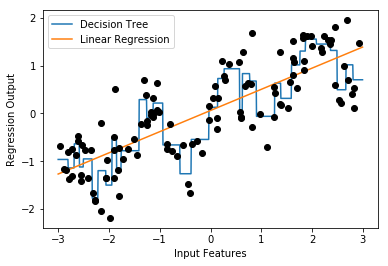

In [38]:
Dtreg = DecisionTreeRegressor(min_samples_leaf = 3).fit(X,y)
predicted = Dtreg.predict(line)
plt.plot(line, predicted, label="Decision Tree")

linreg = LinearRegression().fit(X,y)
linpredicted = linreg.predict(line)
plt.plot(line, linpredicted, label = "Linear Regression" )

plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input Features")
plt.legend(loc = 'best')

In [39]:
print(linreg.score(X, y))
print(Dtreg.score(X, y))

0.6263363499825908
0.8562462696125981


In [214]:
# Linear models (orange line) can build only simple models but decision trees can build simple to complex models
# In case we have to use linear models, we can make them more powerful by changing the data representation 
# one way to make linear models more powerful is binning the data



In [31]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins=10, strategy='uniform')

kb.fit(X)

print("bin edges \n", kb.bin_edges_)



bin edges 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


In [32]:
# With the bins defined, we can transform each data point X into a bin using the transform function

X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [33]:
print(X_binned.toarray()[0,:])
print(pd.DataFrame(X).head(1))   #First data point -0.752759 is stored in bin 4

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
          0
0 -0.752759


In [34]:
# To prevent sparse matrix and create dense matrix, let us re-do the binning with onehot coding. A given input belongs to
# one bin and not others. Hence, we can onehot code them

kb = KBinsDiscretizer( n_bins = 10, strategy ='uniform', encode ='onehot-dense') 
kb.fit(X) 
X_binned = kb.transform(X)

In [248]:
X_binned[0:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [35]:
# bin the input line data too which is our test data

line_binned = kb.transform(line)


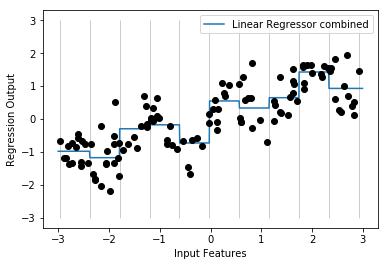

In [42]:
linreg = LinearRegression().fit(X_binned, y)
Dtreg = DecisionTreeRegressor(min_samples_leaf = 3).fit(X_binned,y)
predicted = linreg.predict(line_binned)
plt.plot(line, predicted, label = 'Linear Regressor combined')

#Dtreg = DecisionTreeRegressor(min_samples_split = 3).fit(X_binned,y)
#predicted = Dtreg.predict(line_binned)
#plt.plot(line, predicted, label="Decision Tree combined")


plt.plot(X[:,0], y, 'o', c='k')       # plotting origial X Vs y. The slope of line may not match coeff
plt.vlines(kb.bin_edges_[0], -3,3, linewidth=1, alpha=.2)
plt.ylabel("Regression Output")
plt.xlabel("Input Features")
plt.legend(loc = 'best')

In [43]:
print(linreg.score(X_binned, y))
print(Dtreg.score(X_binned, y))   # Performance of DT has gone down because now it is built on bins not original data

0.7237309728172019
0.7237309728172018


In [44]:
# The decision tree boundaries and linear regression boundaries are exactly same. They are overlapping. For each bin they
# are predicting a constant value. To convince, comment out the plot for Decision Tree... You will see the regression line
# Comparing the linear models before binning and after binning, we can see that the linear model has become more flexible.

In [45]:
print("coefficients for each bin \n", linreg.coef_ ) #coefficients for each bin.
print("")
print("intercept\n", linreg.intercept_)

coefficients for each bin 
 [-1.03201943 -1.22695979 -0.34954264 -0.2295748  -0.78029033  0.49470868
  0.28071025  0.59355014  1.37382361  0.8755943 ]

intercept
 0.05544260355818969


In [224]:
# compare the linear regression scores before and after binning

# Adding slope to the linear model in a bin

In [46]:
X_combined = np.hstack([X, X_binned])
line_combined = np.hstack([line, line_binned])
X_combined[0:10]

array([[-0.75275929,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 2.70428584,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 1.39196365,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.59195091,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-2.06388816,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-2.06403288,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.   

In [47]:
print('X_Combined shape :', X_combined.shape)  #from 10 onehotcoded columns, it has become 11

X_Combined shape : (120, 11)


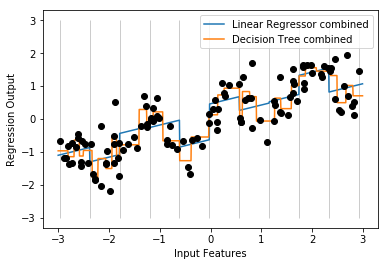

In [48]:
linreg = LinearRegression().fit(X_combined, y)
predicted = linreg.predict(line_combined)
plt.plot(line, predicted, label = 'Linear Regressor combined')

Dtreg = DecisionTreeRegressor(min_samples_leaf = 3).fit(X_combined,y)
predicted = Dtreg.predict(line_combined)
plt.plot(line, predicted, label="Decision Tree combined")


plt.plot(X[:,0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3,3, linewidth=1, alpha=.2)
plt.ylabel("Regression Output")
plt.xlabel("Input Features")
plt.legend(loc = 'best')

In [49]:
# linear regression model now has learnt a slope but the slope is same in all the bins (blue line)

In [50]:
print("coefficients for each bin \n", linreg.coef_ ) #coefficients for each bin.
print("")
print("intercept\n", linreg.intercept_)

coefficients for each bin 
 [ 0.37891039 -0.02879907 -0.46519195  0.17621386  0.13142368 -0.68549904
  0.39882373 -0.01863165  0.02106605  0.6006746  -0.13008021]

intercept
 0.0665722481942536


In [51]:
print(linreg.score(X_combined, y))
print(Dtreg.score(X_combined, y)) 

0.7277571512572492
0.8562462696125981


In [266]:
# Let us create an interaction feature by using simple multiple operation 

In [52]:
X_product = np.hstack([X_binned, X_binned * X])


print(X_product.shape)

line_product = np.hstack([line_binned, line_binned * line])



(120, 20)


In [53]:
print(X_binned[1])
print(X[1])
print(X_binned[1] * X[1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[2.70428584]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         2.70428584]


In [54]:
X_product[0]

array([ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.75275929, -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ])

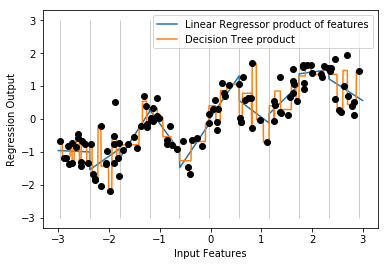

In [55]:
linreg = LinearRegression().fit(X_product, y)
predicted = linreg.predict(line_product)
plt.plot(line, predicted, label = 'Linear Regressor product of features')

Dtreg = DecisionTreeRegressor(min_samples_split = 5).fit(X_product,y)
predicted = Dtreg.predict(line_product)
plt.plot(line, predicted, label="Decision Tree product")


plt.plot(X[:,0], y, 'o', c='k')    # Note: we are plotting original X Vs Y, hence the model slope may not reflect coeff
plt.vlines(kb.bin_edges_[0], -3,3, linewidth=1, alpha=.2)
plt.ylabel("Regression Output")
plt.xlabel("Input Features")
plt.legend(loc = 'best')

In [56]:
# Each bin has it's own offset and its own coefficient.

In [57]:
# Each bin has it's own offset and coefficient

print("coefficients for each bin \n", linreg.coef_ ) #coefficients for each bin.
print("")
print("intercept\n", linreg.intercept_)

coefficients for each bin 
 [-1.64806752  0.55094869  2.63066389 -2.75832344 -0.57192192 -0.44136044
  0.72411153 -2.04973825  0.52299325  3.04069421 -0.06780242  1.0846453
  2.40997624 -2.13237714  2.29987211  2.24215658 -1.15422223  1.49089011
  0.20699844 -0.99043343]

intercept
 0.4899823942964126


In [58]:
print(linreg.score(X_product, y))
print(Dtreg.score(X_product, y))

0.787287089329761
0.9359711056059232


# Polynomial feature transformation 

In [59]:
from sklearn.preprocessing import PolynomialFeatures


In [60]:
poly = PolynomialFeatures(degree=15, include_bias=False)

In [61]:
poly.fit(X)

PolynomialFeatures(degree=15, include_bias=False, interaction_only=False)

In [62]:
X_poly = poly.transform(X)

line_poly = poly.transform(line)

In [63]:
print("X_poly shape: ", X_poly.shape)

X_poly shape:  (120, 15)


In [64]:
# Let us see the difference in the X and X_poly entries

print("Records in X \n", X[0])
print("Records in X_poly \n",X_poly[0])

Records in X 
 [-0.75275929]
Records in X_poly 
 [-0.75275929  0.56664654 -0.42654845  0.32108831 -0.2417022   0.18194358
 -0.13695972  0.1030977  -0.07760775  0.05841996 -0.04397616  0.03310347
 -0.02491894  0.01875796 -0.01412023]


In [65]:
# the columns are x, x^2, x ^3

print("X_Poly feature names : " , poly.get_feature_names())

X_Poly feature names :  ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10', 'x0^11', 'x0^12', 'x0^13', 'x0^14', 'x0^15']


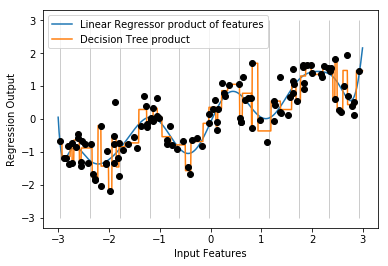

In [66]:
linreg = LinearRegression().fit(X_poly, y)
predicted = linreg.predict(line_poly)
plt.plot(line, predicted, label = 'Linear Regressor product of features')

Dtreg = DecisionTreeRegressor(min_samples_split = 5).fit(X_poly,y)
predicted = Dtreg.predict(line_poly)
plt.plot(line, predicted, label="Decision Tree product")


plt.plot(X[:,0], y, 'o', c='k')    # Note: we are plotting original X Vs Y, hence the model slope may not reflect coeff
plt.vlines(kb.bin_edges_[0], -3,3, linewidth=1, alpha=.2)
plt.ylabel("Regression Output")
plt.xlabel("Input Features")
plt.legend(loc = 'best')

In [67]:
print(linreg.score(X_poly, y))
print(Dtreg.score(X_poly, y))

0.7883503957464659
0.9390385024268483


In [68]:
# Though polynomial features give a smoother and fitting curve, the problem with such features is the behaviour of the model 
# at the extreme values or in regions where data is scant. This could lead to variance errors. If we have to generate polynomial 
# features, SVM /SVR may be a natural choice as SVR generates features using kernels automatically

# SVM generated features

In [69]:
from sklearn.svm import SVR

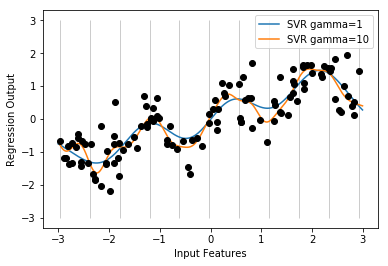

In [380]:
for gamma in [1,10]:
    svr = SVR(gamma = gamma).fit(X, y)   # default degree = 3 
    predicted = svr.predict(line)
    plt.plot(line, predicted, label = 'SVR gamma={}'.format(gamma ))
    
plt.plot(X[:,0], y, 'o', c='k')    # Note: we are plotting original X Vs Y, hence the model slope may not reflect coeff
plt.vlines(kb.bin_edges_[0], -3,3, linewidth=1, alpha=.2)
plt.ylabel("Regression Output")
plt.xlabel("Input Features")
plt.legend(loc = 'best')

In [381]:
print(svr.score(X, y))  #SVR gives same peformance at degree 3 gamma 5 

0.7872376732593508


# Regularizing linear models to select features

In [382]:
svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 10,
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}